In [2]:
# origin image
import numpy as np
from PIL import Image
img = Image.open('lena.bmp')
img_array = np.array(img)
Image.fromarray(img_array)
Image.fromarray(img_array).save('lena.jpg')

# 用來顯示圖片的函數
from IPython.display import display
def show(img_array):
    display(Image.fromarray(img_array))

In [54]:
def convolution(A,B):
    value = 0
    length = A.shape[0]
    assert A.shape == B.shape
    for i in range(length):
        for j in range(length):
            value += (A[i][j]*B[length-i-1][length-j-1])
    return value

In [67]:
def Robert_edge(img_array,threshold):
    length = img_array.shape[0]
    img_temp = np.zeros((length+2,length+2))
    img_temp[1:length+1,1:length+1]+= img_array
    img_R = np.zeros_like(img_array)+255
    
    kernel1 = np.array([[-1,0],[0,1]])
    kernel2 = np.array([[0,-1],[1,0]])
    
    for i in range(1,length+1,1):
        for j in range(1,length+1,1):
            r1 = convolution(img_temp[i:i+2,j:j+2],kernel1)
            r2 = convolution(img_temp[i:i+2,j:j+2],kernel2)
            if((r1**2+r2**2)**0.5 >= threshold):
                img_R[i-1][j-1] = 0
    return np.uint8(img_R)

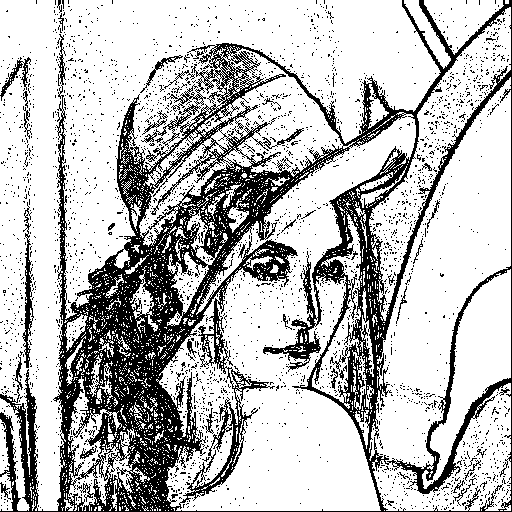

In [117]:
img_R = Robert_edge(img_array,12)
show(img_R)
Image.fromarray(img_R).save('lena_Robert_12.bmp')

In [118]:
def Prewitt_edge(img_array,threshold):
    length = img_array.shape[0]
    img_temp = np.zeros((length+4,length+4))
    img_temp[2:length+2,2:length+2]+= img_array
    img_P = np.zeros_like(img_array)+255
    
    kernel1 = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
    kernel2 = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    
    for i in range(2,length+2,1):
        for j in range(2,length+2,1):
            r1 = convolution(img_temp[i:i+3,j:j+3],kernel1)
            r2 = convolution(img_temp[i:i+3,j:j+3],kernel2)
            if((r1**2+r2**2)**0.5 >= threshold):
                img_P[i-2][j-2] = 0
    return np.uint8(img_P)

In [119]:
img_P = Prewitt_edge(img_array,24)

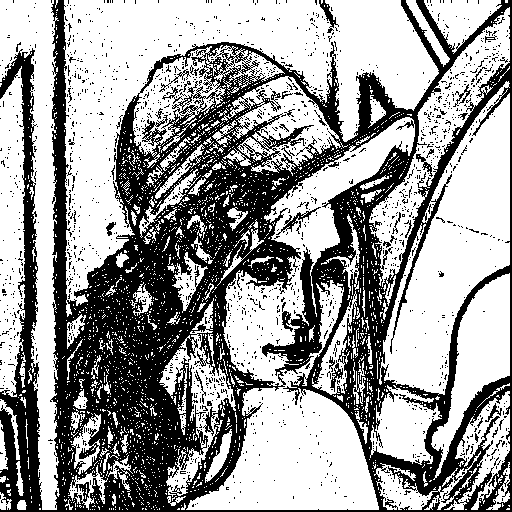

In [125]:
show(img_P)
Image.fromarray(img_P).save('lena_Prewitt_24.bmp')

In [121]:
def Sobel_edge(img_array,threshold):
    length = img_array.shape[0]
    img_temp = np.zeros((length+4,length+4))
    img_temp[2:length+2,2:length+2]+= img_array
    img_S = np.zeros_like(img_array)+255
    
    kernel1 = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
    kernel2 = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    
    for i in range(2,length+2,1):
        for j in range(2,length+2,1):
            r1 = convolution(img_temp[i:i+3,j:j+3],kernel1)
            r2 = convolution(img_temp[i:i+3,j:j+3],kernel2)
            if((r1**2+r2**2)**0.5 >= threshold):
                img_S[i-2][j-2] = 0
    return np.uint8(img_S)

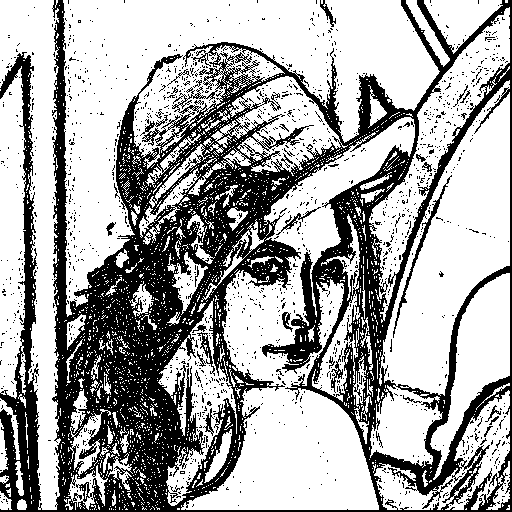

In [124]:
img_S = Sobel_edge(img_array,38)
show(img_S)
Image.fromarray(img_S).save('lena_Sobel_38.bmp')

In [94]:
def Frei_and_Chen_edge(img_array,threshold):
    length = img_array.shape[0]
    img_temp = np.zeros((length+4,length+4))
    img_temp[2:length+2,2:length+2]+= img_array
    img_F = np.zeros_like(img_array)+255
    
    kernel1 = np.array([[-1,-(2**0.5),-1],[0,0,0],[1,2**0.5,1]])
    kernel2 = np.array([[-1,0,1],[-(2**0.5),0,(2**0.5)],[-1,0,1]])
    
    for i in range(2,length+2,1):
        for j in range(2,length+2,1):
            r1 = convolution(img_temp[i:i+3,j:j+3],kernel1)
            r2 = convolution(img_temp[i:i+3,j:j+3],kernel2)
            if((r1**2+r2**2)**0.5 >= threshold):
                img_F[i-2][j-2] = 0
    return np.uint8(img_F)

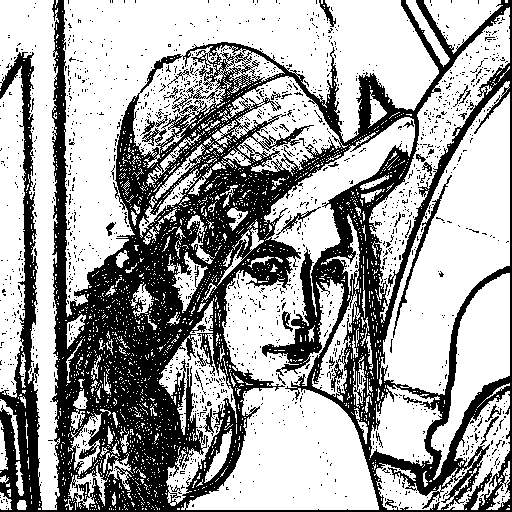

In [123]:
img_F = Frei_and_Chen_edge(img_array,30)
show(img_F)
Image.fromarray(img_F).save('lena_Frei_and_Chen_30.bmp')

In [96]:
def Kirsch_edge(img_array,threshold):
    length = img_array.shape[0]
    img_temp = np.zeros((length+4,length+4))
    img_temp[2:length+2,2:length+2]+= img_array
    img_K = np.zeros_like(img_array)+255
    
    k1 = np.array([[-3,-3,5],[-3,0,5],[-3,-3,5]])
    k2 = np.array([[-3,5,5],[-3,0,5],[-3,-3,-3]])
    k3 = np.array([[5,5,5],[-3,0,-3],[-3,-3,-3]])
    k4 = np.array([[5,5,-3],[5,0,-3],[-3,-3,-3]])
    k5 = np.array([[5,-3,-3],[5,0,-3],[5,-3,-3]])
    k6 = np.array([[-3,-3,-3],[5,0,-3],[5,5,-3]])
    k7 = np.array([[-3,-3,-3],[-3,0,-3],[5,5,5]])
    k8 = np.array([[-3,-3,-3],[-3,0,5],[-3,5,5]])
    k_list = [k1,k2,k3,k4,k5,k6,k7,k8]
    
    for i in range(2,length+2,1):
        for j in range(2,length+2,1):
            g = -1
            for k in k_list:
                g = max(g,convolution(img_temp[i:i+3,j:j+3],k))
            
            if(g >= threshold):
                img_K[i-2][j-2] = 0
    return np.uint8(img_K)

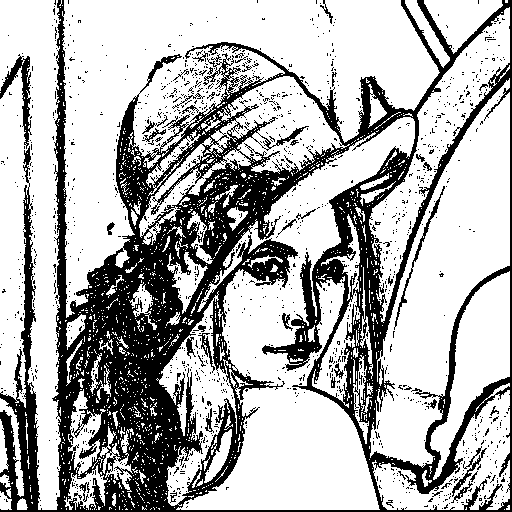

In [126]:
img_K = Kirsch_edge(img_array,135)
show(img_K)
Image.fromarray(img_K).save('lena_Kirsch_135.bmp')

In [98]:
def Robinsion_edge(img_array,threshold):
    length = img_array.shape[0]
    img_temp = np.zeros((length+4,length+4))
    img_temp[2:length+2,2:length+2]+= img_array
    img_Robin = np.zeros_like(img_array)+255
    
    k1 = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    k2 = np.array([[0,1,2],[-1,0,1],[-2,-1,0]])
    k3 = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
    k4 = np.array([[2,1,0],[1,0,-1],[0,-1,-2]])
    k5 = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
    k6 = np.array([[0,-1,-2],[1,0,-1],[2,1,0]])
    k7 = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
    k8 = np.array([[-2,-1,0],[-1,0,1],[0,1,2]])
    k_list = [k1,k2,k3,k4,k5,k6,k7,k8]
    
    for i in range(2,length+2,1):
        for j in range(2,length+2,1):
            g = -1
            for k in k_list:
                g = max(g,convolution(img_temp[i:i+3,j:j+3],k))
            
            if(g >= threshold):
                img_Robin[i-2][j-2] = 0
    return np.uint8(img_Robin)

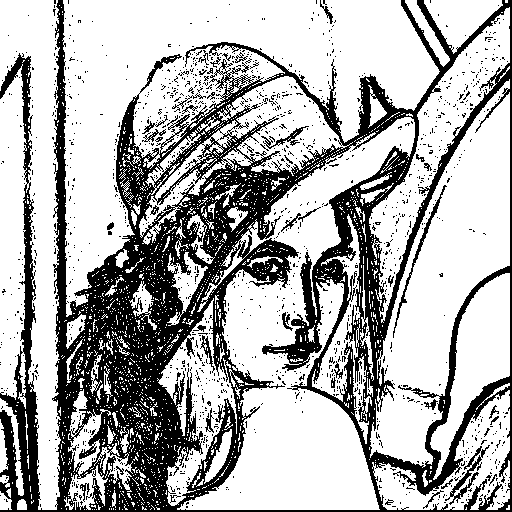

In [127]:
img_Robin = Robinsion_edge(img_array,43)
show(img_Robin)
Image.fromarray(img_Robin).save('lena_Robinson_43.bmp')

In [128]:
def Nevatia_and_Badu_edge(img_array,threshold):
    length = img_array.shape[0]
    img_temp = np.zeros((length+8,length+8))
    img_temp[4:length+4,4:length+4]+= img_array
    img_N = np.zeros_like(img_array)+255
    
    k1 = np.array([[100,100,100,100,100],[100,100,100,100,100],[0,0,0,0,0],[-100,-100,-100,-100,-100],[-100,-100,-100,-100,-100]])
    k2 = np.array([[100,100,100,100,100],[100,100,100,78,-32],[100,92,0,-92,-100],[32,-78,-100,-100,-100],[-100,-100,-100,-100,-100]])
    k3 = np.array([[100,100,100,32,-100],[100,100,92,-78,-100],[100,100,0,-100,-100],[100,78,-92,-100,-100],[100,-32,-100,-100,-100]])
    k4 = np.array([[-100,32,100,100,100],[-100,-78,92,100,100],[-100,-100,0,100,100],[-100,-100,-92,78,100],[-100,-100,-100,-32,100]])
    k5 = np.array([[-100,-100,0,100,100],[-100,-100,0,100,100],[-100,-100,0,100,100],[-100,-100,0,100,100],[-100,-100,0,100,100]])
    k6 = np.array([[100,100,100,100,100],[-32,78,100,100,100],[-100,-92,0,92,100],[-100,-100,-100,-78,32],[-100,-100,-100,-100,-100]])

    k_list = [k1,k2,k3,k4,k5,k6]
    
    for i in range(4,length+4,1):
        for j in range(4,length+4,1):
            g = -1
            for k in k_list:
#                 g = max(g,convolution(img_temp[i:i+5,j:j+5],k))
                g = max(g,np.sum(img_temp[i:i+5,j:j+5]*k))
            if(g >= threshold):
                img_N[i-4][j-4] = 0
    return np.uint8(img_N)

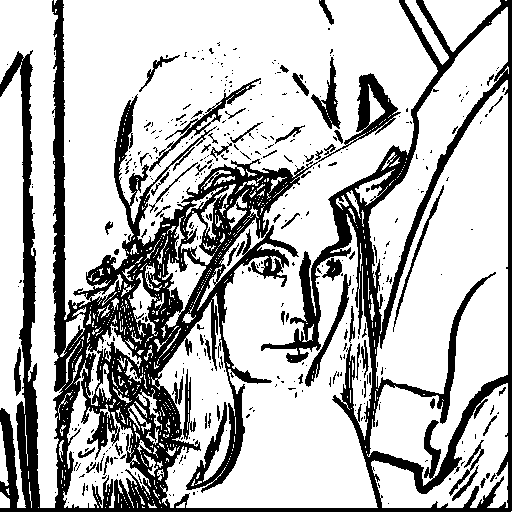

In [129]:
img_N = Nevatia_and_Badu_edge(img_array,12500)
show(img_N)
Image.fromarray(img_N).save('lena_Nevatia_and_Badu_12500.bmp')